In [1]:
import pandas as pd
import seaborn as sns
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv("car data.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [4]:
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.590,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.540,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.850,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.150,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.870,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.830,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.120,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.610,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.890,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.920,42367,Diesel,Dealer,Manual,0


In [5]:
print(df['Fuel_Type']. unique())
print(df['Seller_Type']. unique())
print(df['Owner']. unique())
print(df['Transmission']. unique())

['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
[0 1 3]
['Manual' 'Automatic']


In [6]:
# check missing or null values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [8]:
# no of years of car, a new feature creation

pres_year = 2022
df['no_years'] = pres_year - df['Year']

df = df.drop(['Year', 'Car_Name'], axis = 1)

In [9]:
# one_hot_encode every categorical columns, dropping first col to avoid multicollinearity

final_data = pd.get_dummies(df, drop_first = True)

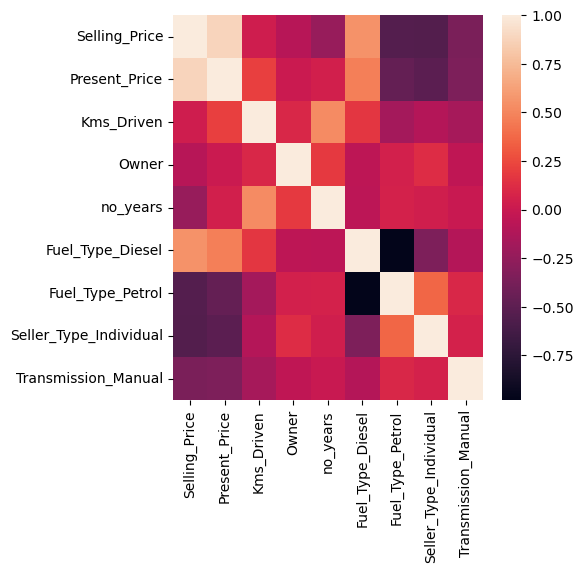

In [10]:
corr_features = (final_data.corr()).index
plt.figure(figsize = (5,5))

#heatmap
h = sns.heatmap(final_data[corr_features].corr())

In [11]:
final_data.columns

Index(['Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner', 'no_years',
       'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Seller_Type_Individual',
       'Transmission_Manual'],
      dtype='object')

In [12]:
X = final_data.iloc[:, 1:]
y = final_data.iloc[:, 0]

In [13]:
# check importance of features

model = ExtraTreesRegressor()
model.fit(X,y)

model.feature_importances_

array([0.36945826, 0.04068074, 0.00044854, 0.07644895, 0.23828131,
       0.0104652 , 0.11981242, 0.14440459])

<AxesSubplot: >

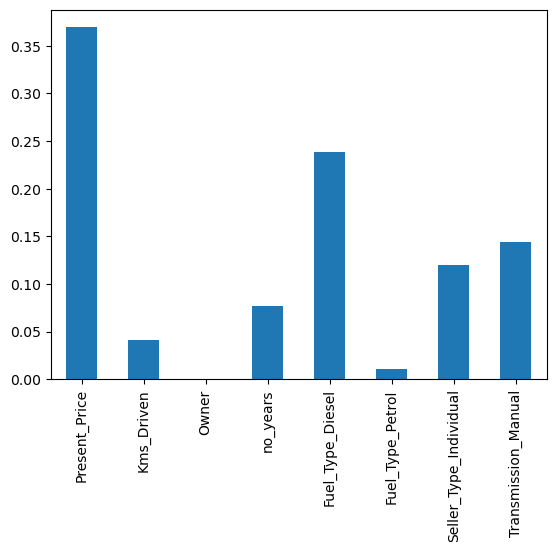

In [14]:
# visualise feature importances

feature_imp = pd.Series(model.feature_importances_, index = X.columns)
feature_imp.plot(kind = 'bar')

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2)

In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
import pickle
import numpy as np

In [17]:
# for hyperparameter tuning

n_estimators = [int(i) for i in np.linspace(100, 1200, 12)] # number of trees
max_features = ['auto', 'sqrt'] # method of select no of features atevery split
max_depth = [int(i) for i in np.linspace(5, 30, 6)] # max tree height
min_samples_split = [2, 5, 10, 15, 20, 25] # min no of sample required to make a node
min_sample_leaf = [1, 2, 5, 10] # min no of sample required at each node

In [18]:
# create the grid and model
grid = {
    'n_estimators':n_estimators,
    'max_features':max_features,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split,
    'min_samples_leaf':min_sample_leaf
}

In [19]:
rf = RandomForestRegressor()
rf_grid = RandomizedSearchCV(estimator=rf, param_distributions=grid, scoring = 'neg_mean_squared_error', verbose = 1, n_jobs = -1)
rf_grid.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\lenovo\anaconda3\envs\carpricepred\lib\site-packages\sklearn\ensemble\_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomizedSearchCV(estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15, 20,
                                                              25],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   scoring='neg_mean_squared_error', verbose=1)

In [20]:
pred = rf_grid.predict(X_test)

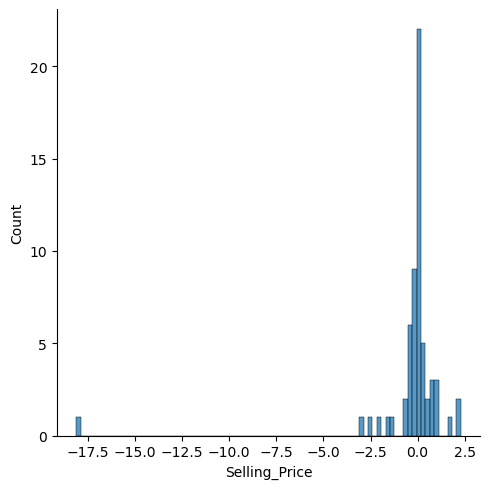

In [21]:
sns.displot(pred-y_test)

In [22]:
file = open("random_forest_model.pkl", 'wb')
pickle.dump(rf_grid, file)